# **Storytelling Data Visualization on Exchange Rates**

The dataset we'll use describes Euro daily exchange rates between 1999 and 2021. The euro (symbolized with €) is the official currency in most of the countries of the European Union.

If the exchange rate of the euro to the US dollar is 1.5, you get 1.5 US dollars if you pay 1.0 euro (one euro has more value than one US dollar at this exchange rate).

Daria Chemkaeva put together the data set and made it available on [Kaggle](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020) — the data source is the European Central Bank. Note that the dataset gets regular updates — we downloaded it on January 2021.

## The Dataset

In [31]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
sns.set_theme()

In [3]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

In [4]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [5]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


There are 41 columns and 5,699 rows recording daily exchange rates with different countries between 1999 and 2021. There are days where some of exchange rates were missing.

While the exchange rates should be floating data types, many columns currently are in object datatypes. We'll need to convert these columns into floating data types. 

## Data Cleaning
Before analyzing the EU-US exchange rates, we'll do some data cleaning:
- We rename the `[US dollar ]` and `Period\Unit`: columns to something easier to type — US_dollar and Time.
- We change the Time column to a datetime data type.
- We sort the values by Time in ascending order.
- We reset the index (and drop the initial index).
- We covnert the `[US dollar ]`column to a float data type.

In [6]:
exchange_rates.rename(columns={'[US dollar ]':'US dollar','Period\\Unit:':'Time'}, inplace=True)
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)
exchange_rates.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [7]:
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
print(exchange_rates['Time'].dtypes)


datetime64[ns]


In [8]:
euro_to_dollar = exchange_rates[['Time','US dollar']].copy()
euro_to_dollar['US dollar'].sort_values()

3209         -
2694         -
1128         -
1120         -
1119         -
         ...  
2491    1.5919
2422    1.5928
2426    1.5931
2427    1.5940
2486    1.5990
Name: US dollar, Length: 5699, dtype: object

There are rows with values '-', we'll check to see if we should drop these rows.

In [9]:
euro_to_dollar['US dollar'].value_counts(normalize=True)

US dollar
-         0.010879
1.2276    0.001579
1.1215    0.001404
1.1305    0.001228
1.1797    0.001053
            ...   
1.2571    0.000175
1.2610    0.000175
1.2651    0.000175
1.2632    0.000175
1.2193    0.000175
Name: proportion, Length: 3528, dtype: float64

There are only nearly 1.1% of rows with '-' value so we can drop those for our analysis.

In [10]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US dollar'] != '-']
euro_to_dollar['US dollar'] = euro_to_dollar['US dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


## Exploratory Analysis
We'll generate a line plot to visualize the evolution of the euro-dollar exchange rate.

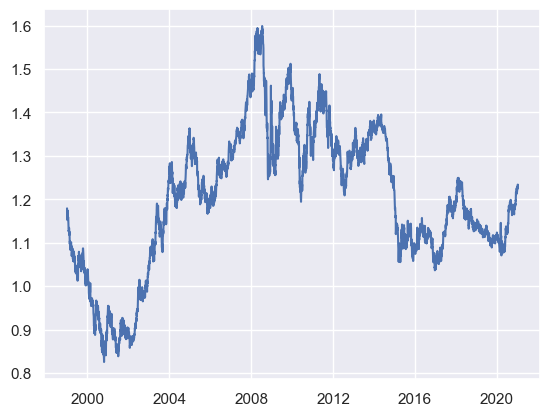

In [11]:
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US dollar'])
plt.show()

If we look at the line's shape, we see many small wiggles — rather than seeing a smooth line. The wiggles, however, have meaning: : they are the visual representation of the daily variation in the exchange rate. The rate goes up and down, up and down again, day to day. The rate only shows clear upward or downward trends in the longer run (months or years).

We'll use the rolling mean to show the long term trend of euro-dollar exchange rates instread of daily variation.

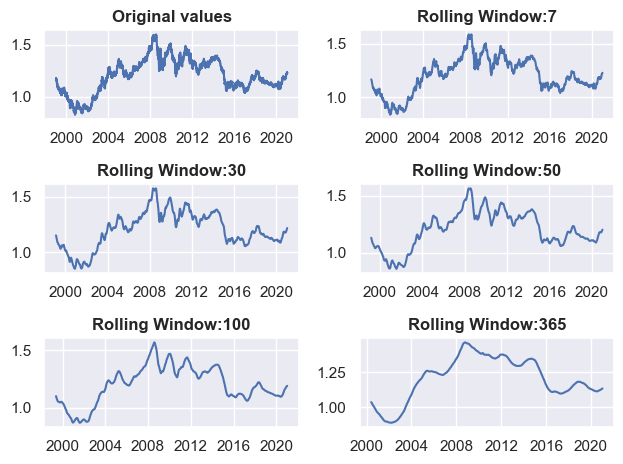

In [12]:
plt.Figure(figsize=(20,12))

plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'],euro_to_dollar['US dollar'])
plt.title('Original values',weight ='bold')

for i, rolling_mean in zip([2,3,4,5,6],[7,30,50,100,365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar['Time'],euro_to_dollar['US dollar'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:'+ str(rolling_mean),weight='bold')

plt.tight_layout() # Auto-adjusts the padding between subplots
plt.show()

In [13]:
euro_to_dollar['rolling_mean_30'] = euro_to_dollar['US dollar'].rolling(30).mean()


In [14]:
euro_to_dollar.head(50)

,Time,US dollar,rolling_mean_30
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
5,1999-01-11,1.1569,NaN
6,1999-01-12,1.1520,NaN
7,1999-01-13,1.1744,NaN
8,1999-01-14,1.1653,NaN
9,1999-01-15,1.1626,NaN


Here are a few story ideas for our data:

- We show how the euro-dollar rate changed during the 2007-2008's financial crisis. We can also show the data for 2016 and 2009 for comparison. We can use a line plot.
- We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot.
- We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.

### **2007 - 2008 Financial Crisis and Euros - US Dollar Exchange Rate**

In [83]:
financial_crisis = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2006) & (euro_to_dollar['Time'].dt.year <= 2009)]

financial_crisis_yrs = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2007) & (euro_to_dollar['Time'].dt.year <= 2008)]

In [85]:
### Adding the FiveThirtyEight style
import matplotlib.style as style
style.use('fivethirtyeight')

Text(13000.0, 1.05, '@Anna Nguyen                                                                                                                        Source: European Central Bank')

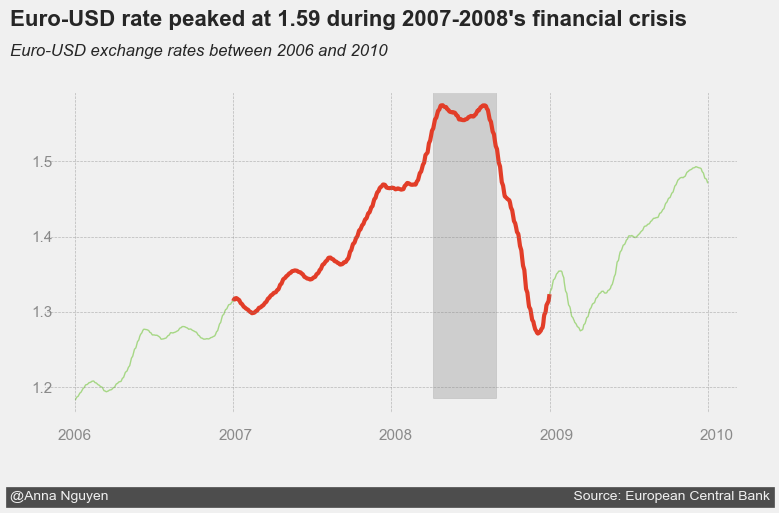

In [163]:
### Adding the plot
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(financial_crisis['Time'],financial_crisis['rolling_mean_30'],linewidth=1,color='#A6D785')

## Highlighting the 2007  2008 period
ax.plot(financial_crisis_yrs['Time'],financial_crisis_yrs['rolling_mean_30'],linewidth=3,color='#e23d28')

### Highlihting the peak of the crisis
ax.axvspan(xmin=13975, xmax=14120, ymin=0.05,
           alpha=0.3, color='grey')

## Adding a title and a subtitle    
ax.text(13000.0, 1.68, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis",
        weight='bold', size= 16)

ax.text(13000.0, 1.64, 'Euro-USD exchange rates between 2006 and 2010',
        size=12, style='italic')

 ### Adding separate tick labels
ax.set_xticklabels([])
x = 13110
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, 1.13, year, alpha=0.5, fontsize=11)
    x += 370

ax.set_yticklabels([])
y = 1.193   
for rate in ['1.2', '1.3', '1.4', '1.5']:
    ax.text(13050.0, y, rate, alpha=0.5, fontsize=11)
    y += 0.1

### Add some transparency to the grid
ax.grid(alpha=0.5)

# Disable default grid
plt.grid()

# Get the ticks locations &  manually draw the grids
ax.get_xticks()
for x_tick in [13149., 13514.,  13879.,  14245., 14610.]:
    ax.axvline(x_tick, color='gray', linestyle='--', linewidth=0.5, alpha = 0.5)

ax.get_yticks()

for y_tick in [1.2, 1.3, 1.4, 1.5]:
    ax.axhline(y_tick, color='gray', linestyle='--', linewidth=0.5, alpha = 0.5)

### Adding a signature
ax.text(13000.0, 1.05, '@Anna Nguyen' + ' '*120 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=10)


### **Three US Presidencies: Euros - US Dollar Exchange Rate**

In [164]:
bush_obama_trump = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year < 2021)]
bush = bush_obama_trump.copy(
       )[bush_obama_trump['Time'].dt.year < 2009]
obama = bush_obama_trump.copy(
       )[(bush_obama_trump['Time'].dt.year >= 2009) & (bush_obama_trump['Time'].dt.year < 2017)]
trump = bush_obama_trump.copy(
       )[(bush_obama_trump['Time'].dt.year >= 2017) & (bush_obama_trump['Time'].dt.year < 2021)]

In [169]:
bush_obama_trump.describe()

,Time,US dollar,rolling_mean_30
count,5118,5118.000000,5118.000000
mean,2011-01-01 03:27:55.498241280,1.220209,1.219297
min,2001-01-02 00:00:00,0.838400,0.851393
25%,2005-12-30 18:00:00,1.119800,1.117298
50%,2010-12-30 12:00:00,1.225800,1.224142
75%,2015-12-30 18:00:00,1.330875,1.328083
max,2020-12-31 00:00:00,1.599000,1.574333
std,NaN,0.153909,0.153988


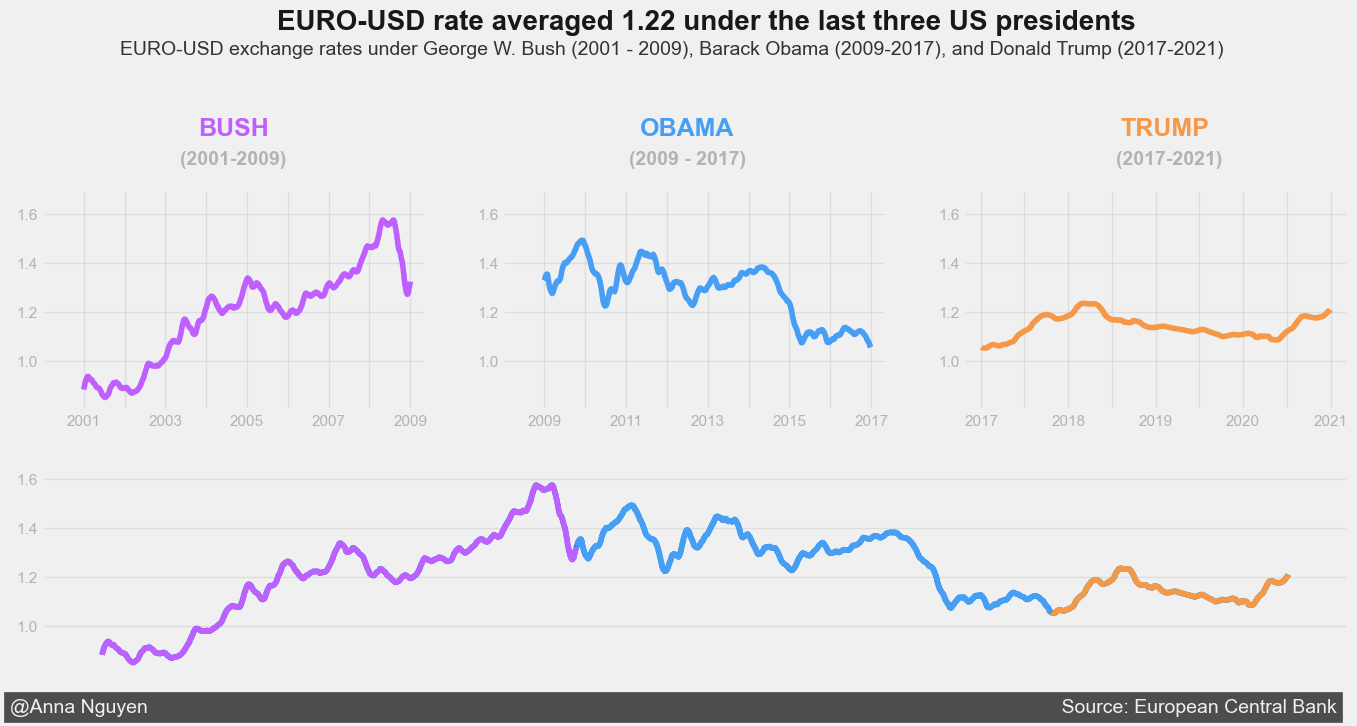

In [287]:
## Adding the chart style
style.use('fivethirtyeight')

## Adding the subplots
plt.figure(figsize=(15,6), dpi = 100)
# We first build three of the graphs on a 2-by-3 grid (this grid should have six subplots, but we only build three; the bottom row remains empty).
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
# We then build only the bottom graph of a 2-by-1 grid (this grid should have two subplots; the top row remains empty).
ax4 = plt.subplot(2,1,2)
# The two grids are merged, and we end up with three graphs on the top row and one graph on the bottom row.
axes = [ax1,ax2,ax3,ax4]

## Changes to all the subplots
for ax in axes:
    ax.set_ylim(0.8,1.7)
    ax.set_yticks([1.0,1.2,1.4,1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'], alpha=0.3)
    ax.grid(alpha=0.5)

## Ax 1: Bush
ax1.plot(bush['Time'],bush['rolling_mean_30'],color = '#BF5FFF')
ax1.set_xticks([10957, 11323, 11688, 12053, 12418, 12784, 13149, 13514, 13879, 14245])
ax1.set_xticklabels(['','2001','','2003','','2005','','2007','','2009'],alpha = 0.3)
ax1.text(12350, 1.92, 'BUSH', fontsize=18, weight='bold', color='#BF5FFF')
ax1.text(12180, 1.8, '(2001-2009)', weight='bold', alpha=0.3)

## Ax2: Obama
ax2.plot(obama['Time'],obama['rolling_mean_30'],color = '#479ef5')
ax2.set_xticks([13879., 14245., 14610., 14975., 15340., 15706., 16071., 16436., 16801., 17167.])
ax2.set_xticklabels(['','2009','','2011','','2013','','2015','','2017'],alpha = 0.3)
ax2.text(15100, 1.92, 'OBAMA', fontsize=18, weight='bold', color='#479ef5')
ax2.text(15000,1.8, '(2009 - 2017)',weight = 'bold', alpha = 0.3)

## Ax3: Trump
ax3.plot(trump['Time'],trump['rolling_mean_30'],color = '#f59847')
ax3.set_xticks([17167., 17348., 17532., 17713., 17897., 18078., 18262., 18444.,18628.])
ax3.set_xticklabels(['2017','','2018','','2019','','2020','','2021'],alpha = 0.3)
ax3.text(17750,1.92,'TRUMP',fontsize=18,weight='bold',color ='#f59847' )
ax3.text(17730,1.8,'(2017-2021)',weight='bold',alpha = 0.3 )

## Ax4: Merged
ax4.plot(bush_obama_trump['Time'],bush_obama_trump['rolling_mean_30'])
ax4.plot(bush['Time'],bush['rolling_mean_30'],color = '#BF5FFF')
ax4.plot(obama['Time'],obama['rolling_mean_30'],color = '#479ef5')
ax4.plot(trump['Time'],trump['rolling_mean_30'],color = '#f59847')
ax4.grid(alpha=0.5)
ax4.set_xticks([])

## Adding the all charts's titles 
ax1.text(13050, 2.35, 'EURO-USD rate averaged 1.22 under the last three US presidents', fontsize=20, weight='bold', color='#1a1817')
ax1.text(11650, 2.25, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)''', fontsize=14, color='#363332')

### Adding a signature
ax4.text(10757, 0.65, '@Anna Nguyen' + ' '*170 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)

plt.show()

In [ ]:
ax1.set_xticks([10957., 11688.,  12418., 13149., 13879. ],labels= ['2001','2003','2005','2007','2009'])
, labels= ['2001','','2003','','2005','','2007','','2009'])

### **Covid: Euros - US Dollar Exchange Rate**

In [288]:
covid = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2016) & (euro_to_dollar['Time'].dt.year <= 2019)]

covid_yr = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year == 2020)]

In [289]:
covid.describe()

,Time,US dollar,rolling_mean_30
count,1022,1022.000000,1022.000000
mean,2017-12-30 02:49:04.814089984,1.134200,1.133871
min,2016-01-04 00:00:00,1.036400,1.052497
25%,2016-12-29 06:00:00,1.107500,1.106753
50%,2017-12-28 12:00:00,1.127900,1.126697
75%,2018-12-30 06:00:00,1.164125,1.164330
max,2019-12-31 00:00:00,1.249300,1.235627
std,NaN,0.044554,0.043644


In [290]:
covid_yr.describe()

,Time,US dollar,rolling_mean_30
count,257,257.000000,257.000000
mean,2020-07-02 14:17:16.575875584,1.142196,1.136209
min,2020-01-02 00:00:00,1.070700,1.084997
25%,2020-04-01 00:00:00,1.100100,1.100930
50%,2020-07-03 00:00:00,1.133600,1.121130
75%,2020-10-01 00:00:00,1.181400,1.178023
max,2020-12-31 00:00:00,1.228100,1.209623
std,NaN,0.044505,0.039050


Text(16570, 1, '@Anna Nguyen                                                                                                                             Source: European Central Bank')

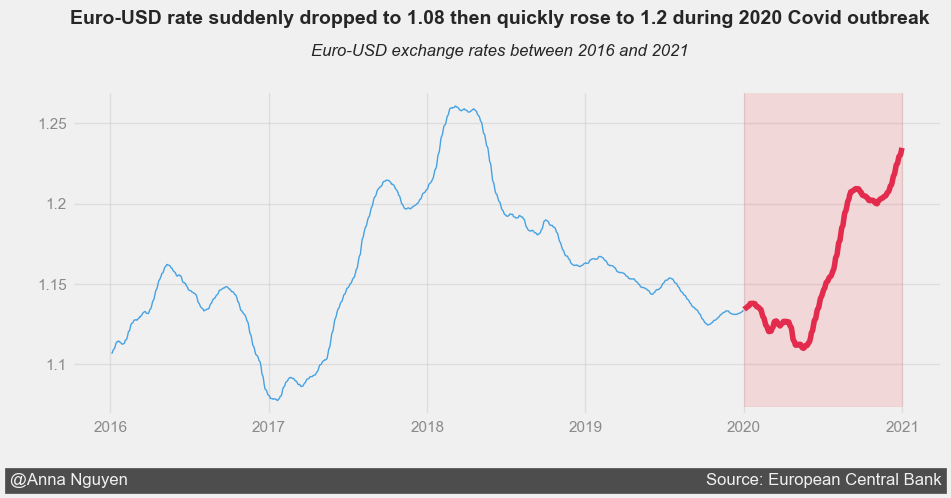

In [408]:
## Add the graph style
style.use('fivethirtyeight')

## Add the plots
fig,ax = plt.subplots(figsize =(10,4))
ax.plot(covid['Time'],covid['rolling_mean_30'],linewidth=1,color='#46a2e3')
ax.grid(alpha=0.5)
ax.set_yticks([1.025,  1.075,  1.125, 1.175, 1.225])
ax.set_yticklabels(['1.05','1.1','1.15','1.2','1.25'],alpha = 0.5)
ax.set_xticks([16436, 16801, 17167, 17532, 17897, 18262, 18628])
ax.set_xticklabels(['','2016','2017','2018','2019','2020','2021'],alpha = 0.5)

## Highlight the period when Covid broke out in the US
ax.plot(covid_yr['Time'],covid_yr['rolling_mean_30'],linewidth=4,color='#e32b4d')
ax.axvspan(xmin=18262, xmax=18628, ymin=0.03,
           alpha=0.1, color='red')

## Adding a title and a subtitle    
ax.text(17700.0, 1.29, "Euro-USD rate suddenly dropped to 1.08 then quickly rose to 1.2 during 2020 Covid outbreak",
        weight='bold', size= 14,ha='center',va ='center')

ax.text(17700.0, 1.27, 'Euro-USD exchange rates between 2016 and 2021',
        size=12, style='italic',ha='center',va = 'center')


### Adding a signature
ax.text(16570, 1, '@Anna Nguyen' + ' '*125 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=12)